In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [3]:
df = pd.read_csv("train_FD003.txt",sep=" ",
                 
    names=["unit_number","time","sen1","sen2","sen3","T2","T24","T30","T50","P2","P15","P30","Nf","Nc","epr","Ps30","phi","NRf","NRc","BPR","farB","htBleed","Nf_dmd","PCNfR_dmd","W31","W32","null1","null2"])

In [4]:
df.head()

,unit_number,time,sen1,sen2,sen3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,null1,null2
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN


In [5]:
df.isnull().sum()

unit_number        0
time               0
sen1               0
sen2               0
sen3               0
T2                 0
T24                0
T30                0
T50                0
P2                 0
P15                0
P30                0
Nf                 0
Nc                 0
epr                0
Ps30               0
phi                0
NRf                0
NRc                0
BPR                0
farB               0
htBleed            0
Nf_dmd             0
PCNfR_dmd          0
W31                0
W32                0
null1          24720
null2          24720
dtype: int64

In [6]:
df.dropna(axis=1,inplace=True)

In [7]:
df.describe()[["sen1","sen2","sen3"]]

,sen1,sen2,sen3
count,24720.000000,24720.000000,24720.0
mean,-0.000024,0.000005,100.0
std,0.002194,0.000294,0.0
min,-0.008600,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,-0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008600,0.000700,100.0


In [8]:
df.describe()[['T2', 'T24', 'T30', 'T50', 'P2',
       'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30']]

,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30
count,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000
mean,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,555.143808,2388.071555,9064.110809,1.301232,47.415707
std,0.00,0.523031,6.810418,9.773178,3.552786e-15,0.018116,3.437343,0.158285,19.980294,0.003485,0.300074
min,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,549.610000,2386.900000,9017.980000,1.290000,46.690000
25%,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,553.110000,2388.000000,9051.920000,1.300000,47.190000
50%,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,554.050000,2388.070000,9060.010000,1.300000,47.360000
75%,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,556.040000,2388.140000,9070.092500,1.300000,47.600000
max,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,570.490000,2388.600000,9234.350000,1.320000,48.440000


In [9]:
df.describe()[['phi', 'NRf', 'NRc', 'BPR',
       'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']]

,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,3.255314,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234
min,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [10]:
df.drop(['T2','P2','epr','farB','Nf_dmd','PCNfR_dmd'],axis=1,inplace=True)

In [15]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50',
       'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed',
       'W31', 'W32'],
      dtype='object')

In [17]:
df.columns[2:]

Index(['sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32'],
      dtype='object')

In [16]:
x_dataset=df[df.columns[2:]]

x_scaled = preprocessing.scale(x_dataset)
x_scaled

array([[-0.21712243,  1.34313474,  0.        , ..., -0.88936355,
         0.48801891, -0.26351159],
       [ 0.37553765, -1.03751852,  0.        , ..., -0.32164071,
         0.00581942,  0.37576676],
       [-0.62742556, -0.6974252 ,  0.        , ..., -0.88936355,
        -0.55674664, -0.17505798],
       ...,
       [-0.71860403,  1.34313474,  0.        , ...,  1.94925065,
        -2.40517799, -2.17665592],
       [-1.03772868,  1.34313474,  0.        , ...,  1.38152781,
        -2.72664432, -2.1290786 ],
       [ 0.01082376,  1.00304142,  0.        , ...,  1.94925065,
        -1.72206206, -2.06608891]])

In [18]:
df1 = pd.DataFrame(data=x_scaled,columns= df.columns[2:])

In [20]:
df1.head()

,sen1,sen2,sen3,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,-0.217122,1.343135,0.0,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,0.375538,-1.037519,0.0,0.080574,-0.497656,-0.775732,0.781589,-0.172755,-0.452071,-0.116658,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767
2,-0.627426,-0.697425,0.0,-0.531256,-0.841254,0.116524,0.781589,-0.207667,-0.262536,0.306267,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058
3,-0.900961,0.322855,0.0,0.883602,-0.362566,-1.248464,0.781589,0.019257,-0.452071,0.022983,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192
4,0.740252,-0.017239,0.0,-1.487242,0.080881,-0.697966,0.781589,-0.117479,-0.199357,0.602065,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416


In [21]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50',
       'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed',
       'W31', 'W32'],
      dtype='object')

In [22]:
df1[['unit_number', 'time']] = df[['unit_number', 'time']]

In [23]:
df1.head()

,sen1,sen2,sen3,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,unit_number,time
0,-0.217122,1.343135,0.0,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512,1,1
1,0.375538,-1.037519,0.0,0.080574,-0.497656,-0.775732,0.781589,-0.172755,-0.452071,-0.116658,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767,1,2
2,-0.627426,-0.697425,0.0,-0.531256,-0.841254,0.116524,0.781589,-0.207667,-0.262536,0.306267,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058,1,3
3,-0.900961,0.322855,0.0,0.883602,-0.362566,-1.248464,0.781589,0.019257,-0.452071,0.022983,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192,1,4
4,0.740252,-0.017239,0.0,-1.487242,0.080881,-0.697966,0.781589,-0.117479,-0.199357,0.602065,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416,1,5


In [24]:
cols = df1.columns.tolist()

In [25]:
cols = cols[-2:] + cols[:-2]
cols

['unit_number',
 'time',
 'sen1',
 'sen2',
 'sen3',
 'T24',
 'T30',
 'T50',
 'P15',
 'P30',
 'Nf',
 'Nc',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'htBleed',
 'W31',
 'W32']

In [26]:
df = df1[cols]

In [27]:
df.head()

,unit_number,time,sen1,sen2,sen3,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.217122,1.343135,0.0,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,1,2,0.375538,-1.037519,0.0,0.080574,-0.497656,-0.775732,0.781589,-0.172755,-0.452071,-0.116658,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767
2,1,3,-0.627426,-0.697425,0.0,-0.531256,-0.841254,0.116524,0.781589,-0.207667,-0.262536,0.306267,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058
3,1,4,-0.900961,0.322855,0.0,0.883602,-0.362566,-1.248464,0.781589,0.019257,-0.452071,0.022983,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192
4,1,5,0.740252,-0.017239,0.0,-1.487242,0.080881,-0.697966,0.781589,-0.117479,-0.199357,0.602065,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416


In [ ]:
new_df = df.drop(['unit_number', 'time', 'sen1', 'sen2'],axis=1)

In [30]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50',
       'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed',
       'W31', 'W32'],
      dtype='object')

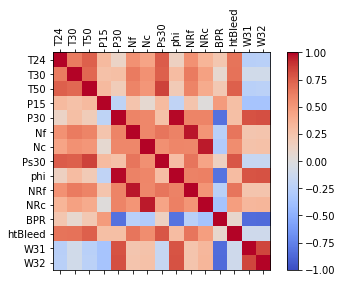

In [32]:
nw_df = df[df.columns[5:]]
corr = nw_df.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap= "coolwarm", vmin=-1,vmax=1)
# to change tick size use np.arange
ticks = np.arange(0,len(nw_df.columns),1)
fig.colorbar(cax)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(nw_df.columns)
ax.set_yticklabels(nw_df.columns)

plt.savefig("fd003-2.png")
    
plt.show()

In [33]:
import random
v = random.sample(range(1, 100), 5)

In [34]:
d = {}
for name in v:
    d[name] = pd.DataFrame(data= df.loc[df["unit_number"] == name],columns=df.columns.tolist())

In [35]:
df.head()

,unit_number,time,sen1,sen2,sen3,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.217122,1.343135,0.0,-0.187102,-0.712038,-0.780848,0.781589,-0.341494,-0.704785,-0.097138,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,1,2,0.375538,-1.037519,0.0,0.080574,-0.497656,-0.775732,0.781589,-0.172755,-0.452071,-0.116658,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767
2,1,3,-0.627426,-0.697425,0.0,-0.531256,-0.841254,0.116524,0.781589,-0.207667,-0.262536,0.306267,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058
3,1,4,-0.900961,0.322855,0.0,0.883602,-0.362566,-1.248464,0.781589,0.019257,-0.452071,0.022983,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192
4,1,5,0.740252,-0.017239,0.0,-1.487242,0.080881,-0.697966,0.781589,-0.117479,-0.199357,0.602065,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416


In [36]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50',
       'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed',
       'W31', 'W32'],
      dtype='object')

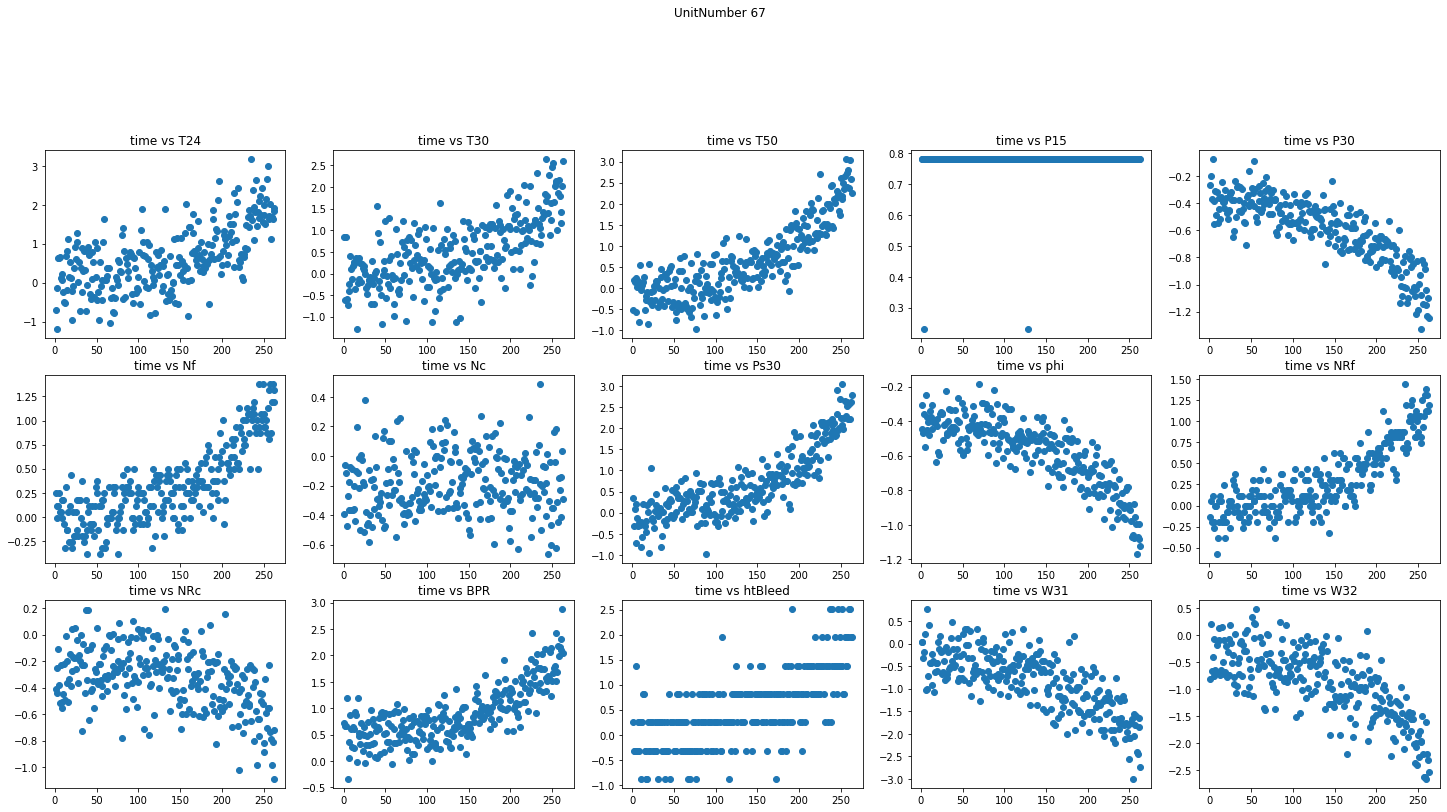

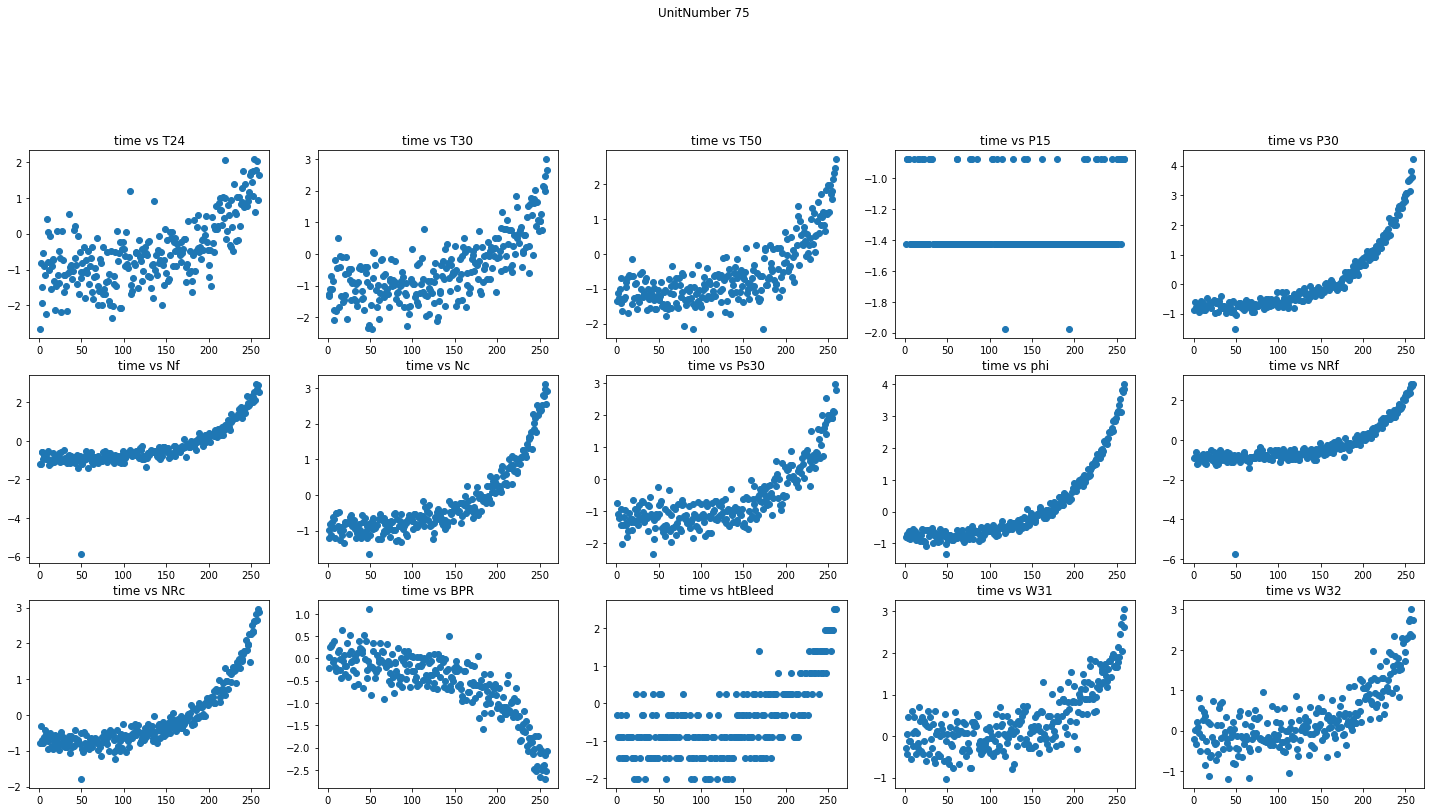

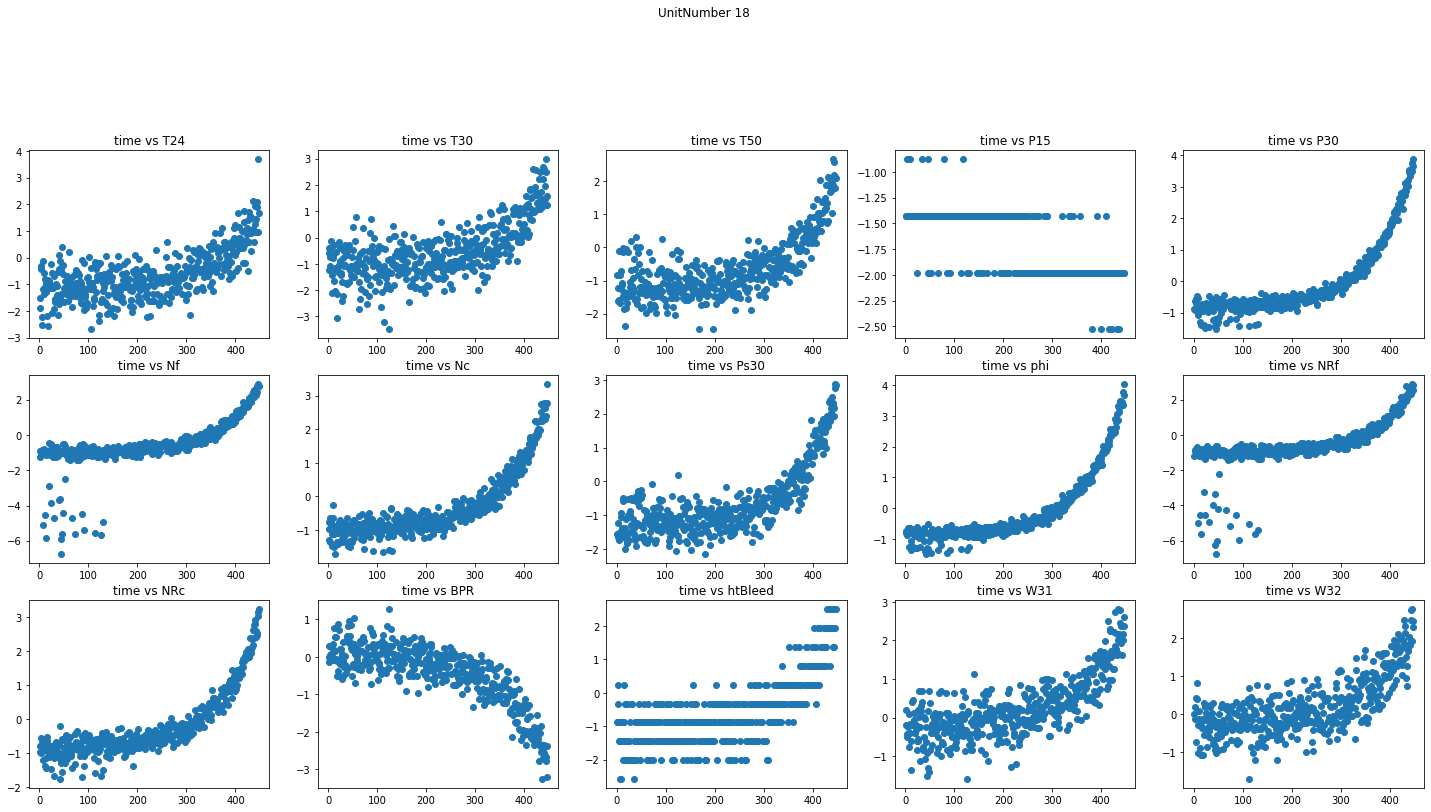

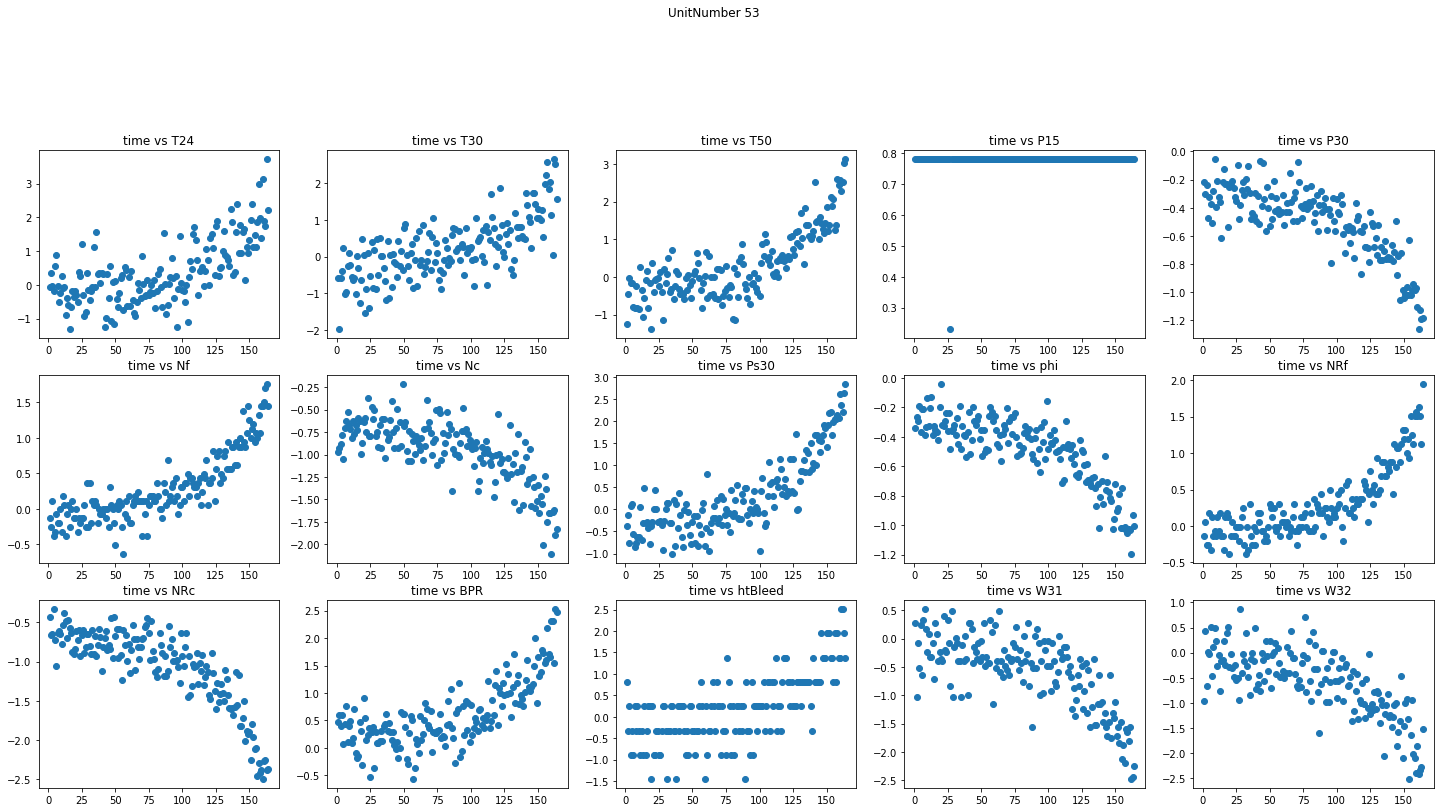

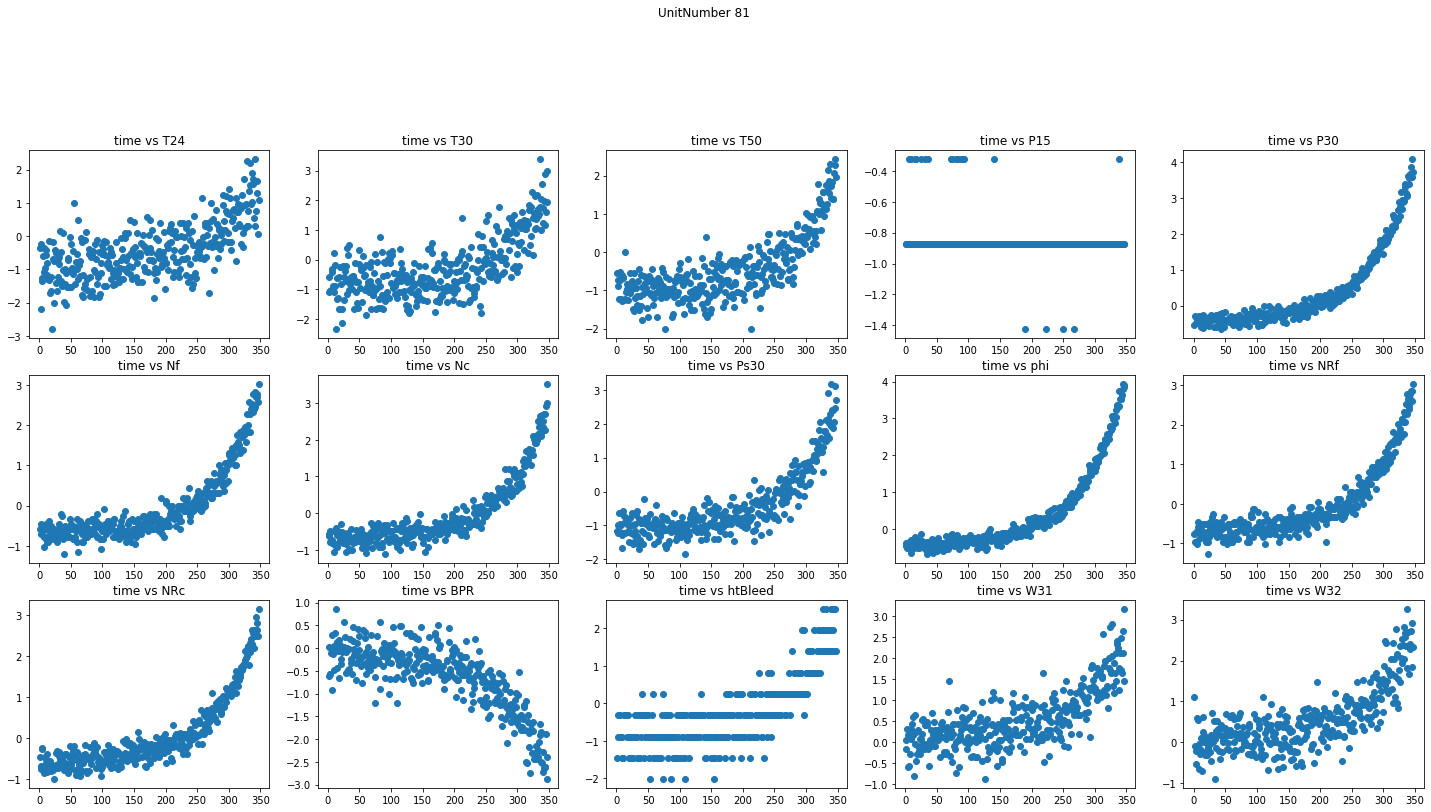

In [37]:
for i in v:
    fig = plt.figure(figsize=(25,20))
    
    for j,k in zip(df.columns[5:],range(1,26)):
        ax = fig.add_subplot(5,5,k)
        ax.scatter(df.loc[df['unit_number']==i]['time'],df.loc[df['unit_number']==i][j])
        ax.title.set_text(f'time vs {j}')
    fig.suptitle(f'UnitNumber {i}')
    plt.show()